In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk import word_tokenize, pos_tag
import nltk
from nltk.util import ngrams

In [2]:
from gensim import matutils, models
import scipy.sparse
import gensim

In [3]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [34]:
from collections import Counter
import operator

In [4]:
add_stop_words=['app','use','good','just','google','like','work',
                'time','need','make','phone','update',
                'great','im','really','option','feature','hey','ok','okay','apps',
                'application','aap','thank','whats','things','wow','sure','love']
from sklearn.feature_extraction import text

stop_words1=text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Topic plot

In [8]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

## Topic list

In [5]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix+1)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Attempt #1 (all text)

In [6]:
data = pd.read_pickle('all_data.pkl')
data.shape

(95003, 14)

In [7]:
cv1=CountVectorizer(stop_words=stop_words1, #token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=5,max_df=0.80, max_features=20000,
                    ngram_range=(1,2))#, preprocessor=' '.join)
df_cv1 = cv1.fit_transform(data.content)
df_review1=pd.DataFrame(df_cv1.toarray(), index= [data.title], columns=cv1.get_feature_names())
df_review1.shape
sparse_counts1 = scipy.sparse.csr_matrix(df_review1)

In [8]:
cv2 = TfidfVectorizer(stop_words=stop_words1,token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=5,max_df=0.80, max_features=20000, 
                      ngram_range=(1,1))#,preprocessor=' '.join)
df_cv2 = cv2.fit_transform(data.content)
df_review2=pd.DataFrame(df_cv2.toarray(), index= [data.title], columns=cv2.get_feature_names())
df_review2.shape
sparse_counts2 = scipy.sparse.csr_matrix(df_review2)

In [9]:
num_cluster=5

In [10]:
nmf_model = NMF(num_cluster)
doc_topic = nmf_model.fit_transform(sparse_counts1)
display_topics(nmf_model, cv1.get_feature_names(), 20)
#plot_top_words(nmf_model, cv1.get_feature_names(), 20, range(0,5))


Topic  1
fix, try, problem, doesnt, issue, device, say, open, screen, new, android, ive, message, stop, change, help, turn, connect, day, download

Topic  2
music, play, youtube, play music, youtube music, song, listen, download, playlist, video, pay, listen music, want, better, yt, transfer, game, service, music play, store

Topic  3
dont, know, want, dont know, dont want, thing, think, people, download, understand, kid, way, say, account, dont understand, star, ad, look, let, come

Topic  4
add, new, task, change, want, nice, search, video, map, note, thing, better, list, contact, way, able, button, star, account, version

Topic  5
photo, edit, picture, file, video, camera, delete, save, scan, folder, upload, image, quality, better, storage, gallery, photo photo, view, share, way


In [11]:
nmf_model = NMF(num_cluster)
doc_topic = nmf_model.fit_transform(sparse_counts2)
display_topics(nmf_model, cv2.get_feature_names(), 10)
#plot_top_words(nmf_model, cv1.get_feature_names(), 20, range(0,5))


Topic  1
nice, easy, experience, helpful, wallpaper, useful, simple, add, game, better

Topic  2
fix, doesnt, try, problem, play, add, open, music, new, download

Topic  3
best, camera, world, photo, edit, experience, keyboard, pdf, thing, quality

Topic  4
bad, experience, quality, kid, thing, survey, translation, review, think, slow

Topic  5
dont, know, want, understand, uninstall, think, download, people, kid, install


# Topic Modeling - Attempt #2 (Noun and Adjectives and Verb)

In [12]:
data_nouns_adj_v =  pd.read_pickle('data_nouns_adj_V.pkl')
#data_nouns_adj_v

In [13]:
add_stop_words=['app','use','just','google','like',
                'time','need','make','phone','update','work','works',
                'im','really','option','feature','hey','ok','okay','apps',
                'application','aap','thank','whats','things','wow','sure',
                'love','super','play','star','good']

stop_words1=text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [14]:
cv1 = TfidfVectorizer(stop_words=stop_words1, token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=2,max_df= 0.5, max_features=5000, 
                      ngram_range=(1,3))#,preprocessor=' '.join)
df_cv1 = cv1.fit_transform(data_nouns_adj_v.content)
df_review1=pd.DataFrame(df_cv1.toarray(), index= [data.title], columns=cv1.get_feature_names())
df_review1.shape
sparse_counts1 = scipy.sparse.csr_matrix(df_review1)

In [15]:
cv2 = TfidfVectorizer(stop_words=stop_words1, token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=2,max_df= 0.5, max_features=10000, 
                      ngram_range=(1,3))#,preprocessor=' '.join)
df_cv2 = cv2.fit_transform(data_nouns_adj_v.content)
df_review2=pd.DataFrame(df_cv2.toarray(), index= [data.title], columns=cv2.get_feature_names())
df_review2.shape
sparse_counts2 = scipy.sparse.csr_matrix(df_review2)

In [16]:
cv3 = TfidfVectorizer(stop_words=stop_words1, token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=2,max_df= 0.5, max_features=10000, 
                      ngram_range=(2,3))#,preprocessor=' '.join)
df_cv3 = cv3.fit_transform(data_nouns_adj_v.content)
df_review3=pd.DataFrame(df_cv3.toarray(), index= [data.title], columns=cv3.get_feature_names())
df_review3.shape
sparse_counts3 = scipy.sparse.csr_matrix(df_review3)

In [17]:
cv4 = TfidfVectorizer(stop_words=stop_words1, token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=2,max_df= 0.8, max_features=20000, 
                      ngram_range=(1,3))#,preprocessor=' '.join)
df_cv4 = cv4.fit_transform(data_nouns_adj_v.content)
df_review4=pd.DataFrame(df_cv4.toarray(), index= [data.title], columns=cv4.get_feature_names())
df_review4.shape
sparse_counts4 = scipy.sparse.csr_matrix(df_review4)

In [18]:
num_cluster=10
nmf_model = NMF(num_cluster)
doc_topic = nmf_model.fit_transform(sparse_counts4)
display_topics(nmf_model, cv4.get_feature_names(), 10)
#plot_top_words(nmf_model, cv1.get_feature_names(), 20, range(0,5))


Topic  1
nice, nice easy, nice experience, nice useful, nice nice, helpful, nice add, wallpaper, experience, nice problem

Topic  2
great, great easy, great experience, great way, great job, wish, experience, job, great great, great add

Topic  3
doesnt, fix, problem, try, add, new, open, music, download, say

Topic  4
best, best best, best camera, world, camera, best thing, best music, best edit, experience, music

Topic  5
bad, bad experience, experience, bad bad, quality, survey, bad thing, kid, slow, bad dont

Topic  6
dont, know, dont know, want, dont want, dont understand, understand, think, dont download, people

Topic  7
excellent, excellent service, service, quality, excellent easy, perfect, amaze, wallpaper, tool, motivate

Topic  8
useful, helpful, nice useful, cool, language, translate, simple, useful tool, tool, important

Topic  9
awesome, experience, cool, helpful, add, wallpaper, awesome experience, amaze, game, keyboard

Topic  10
easy, helpful, simple, great easy, si

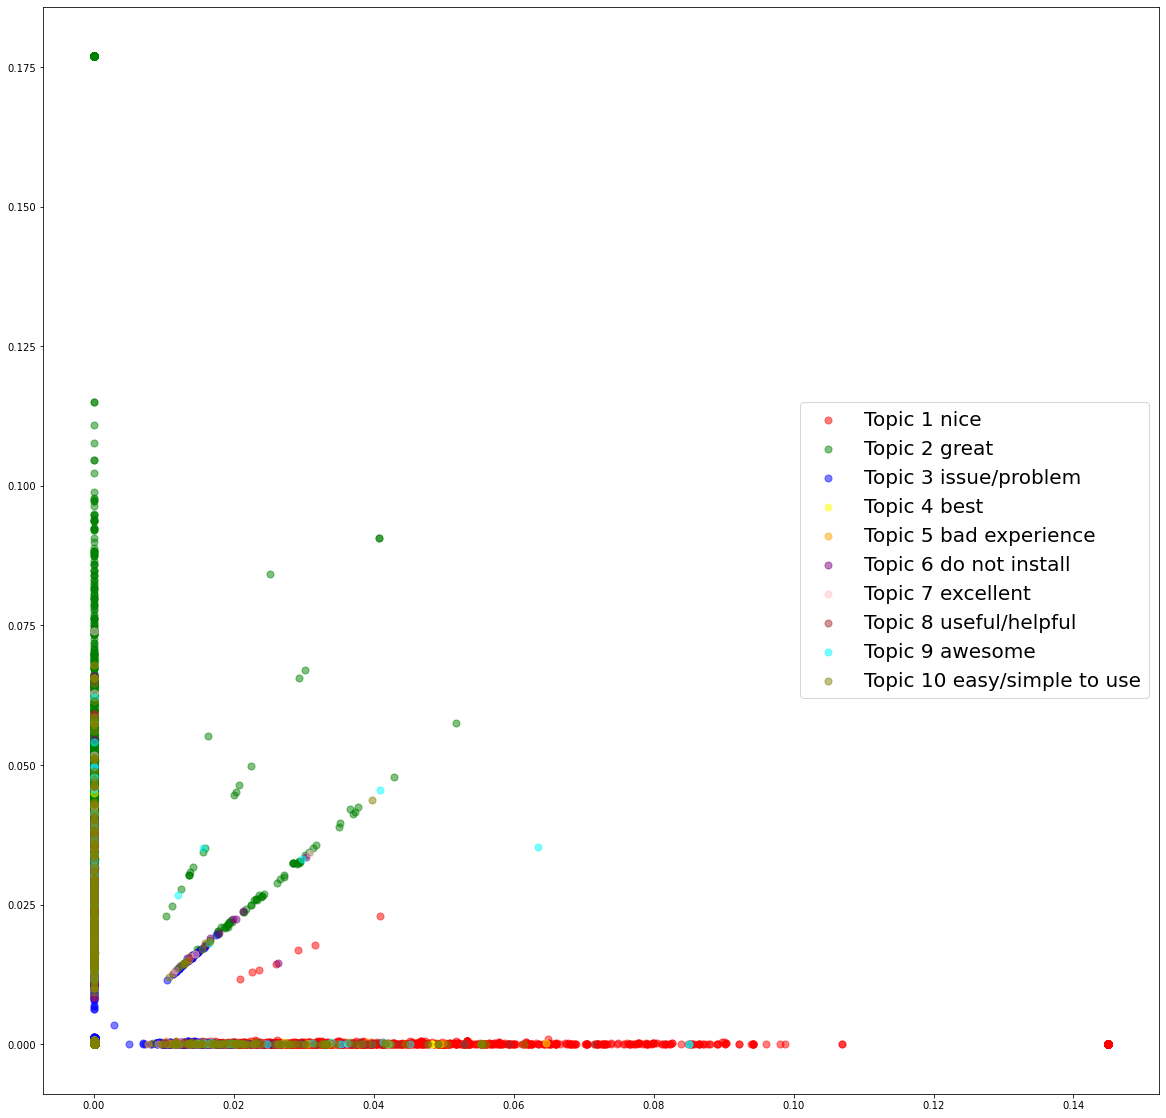

In [19]:
import matplotlib.pyplot as plt
topic_name=['nice','great','issue/problem','best','bad experience', 'do not install', 'excellent',
           'useful/helpful', 'awesome', 'easy/simple to use']
X_nmf = nmf_model.transform(sparse_counts4)
topic_values = nmf_model.transform(df_cv4)
data_nouns_adj_v['topic'] = topic_values.argmax(axis=1)
colors = ['red', 'green','blue','yellow', 'orange', 'purple', 'pink','brown','cyan','olive']
#plt.scatter(X_nmf[:,0], X_nmf[:,1], c=data_nouns_adj_v['topic'].values, 
#            cmap='prism', alpha=0.4, s=200)
#plt.legend(loc=2, prop={'size': 100})
plt.rcParams['figure.figsize'] =[20,20]
for i in range(num_cluster):
    row=data_nouns_adj_v['topic']== i
    plt.scatter(X_nmf[row,0], X_nmf[row,1],  
                cmap='prism', alpha=0.5, s=50 , c= colors[i],
                label='Topic {} {}'.format(i+1,topic_name[i]))

plt.legend(loc=5, prop={'size': 20})


Text(0, 0.5, 'Number of Document')

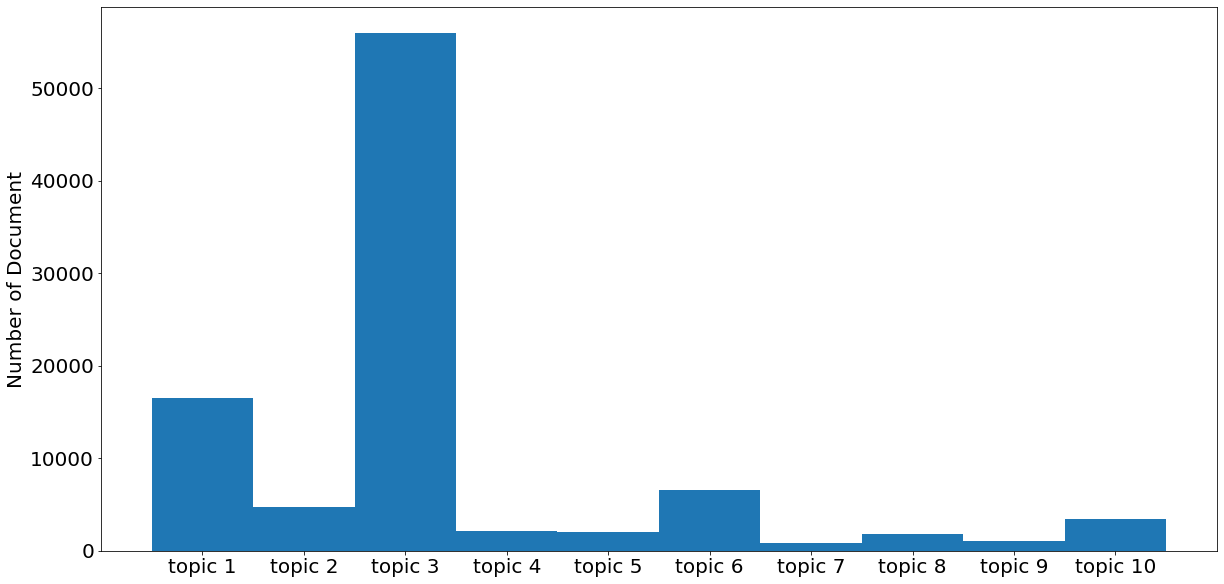

In [20]:
plt.rcParams['figure.figsize'] =[20,10]

plt.hist(sorted(data_nouns_adj_v['topic']),bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5,5.5,6.5,7.5,8.5,9.5])
plt.xticks([0,1,2,3,4,5,6,7,8,9],['topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9','topic 10'],size=20)
plt.yticks(size=20)
plt.ylabel('Number of Document',size=20)

In [21]:
for i in range(num_cluster):
    data_nouns_adj_v['topic'][ data_nouns_adj_v['topic']==i] = 'topic {}'.format(i+1)

<ipython-input-21-8f71fb03f7ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nouns_adj_v['topic'][ data_nouns_adj_v['topic']==i] = 'topic {}'.format(i+1)


In [46]:
tsne = TSNE(n_components=2, random_state=0)
train_X_tsne = tsne.fit_transform(sparse_counts4, data_nouns_adj_v['topic'])

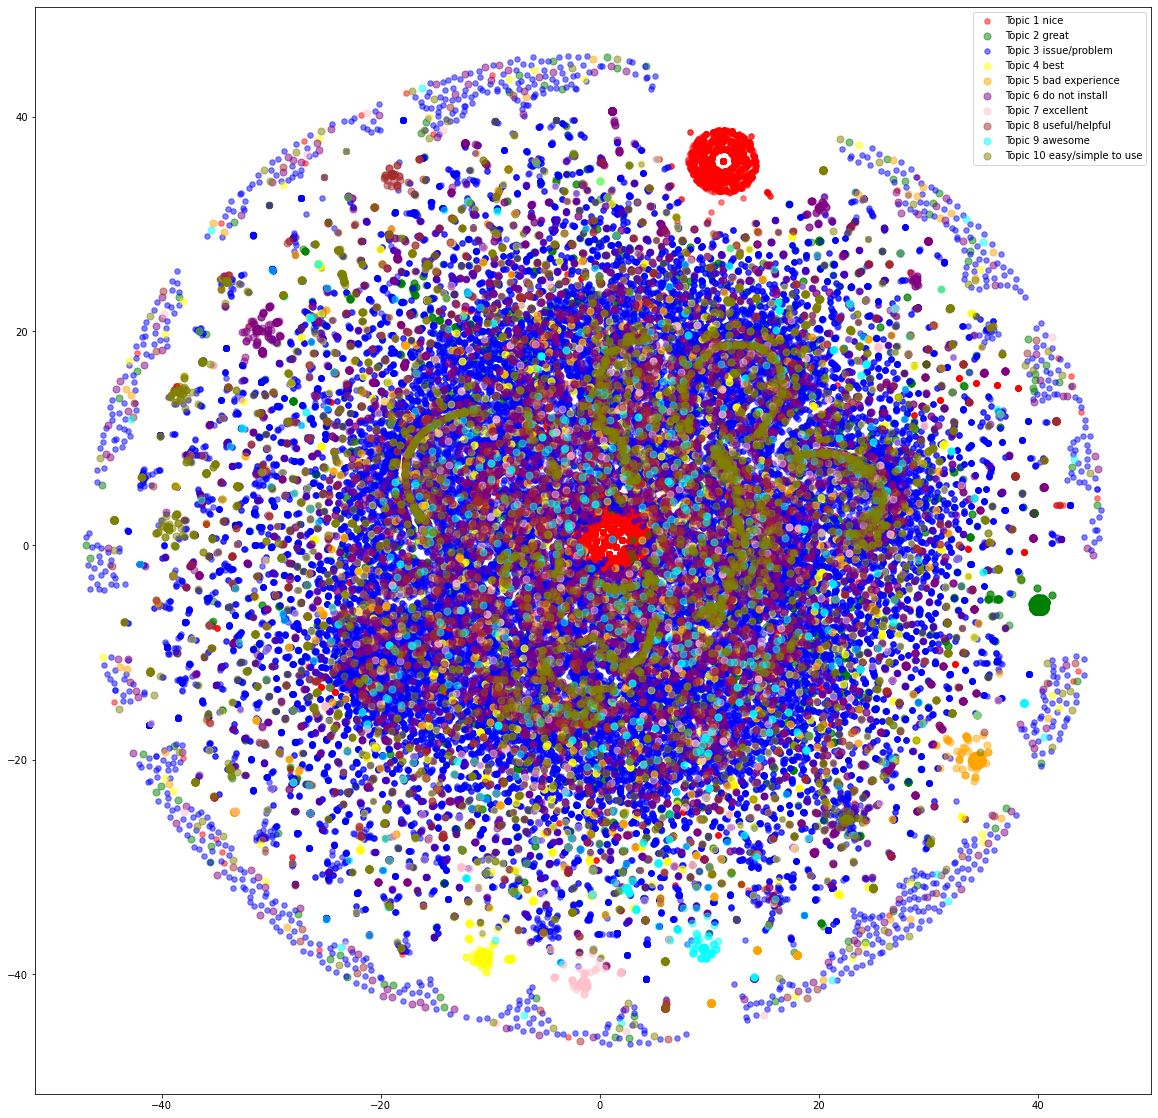

In [47]:
color=data_nouns_adj_v['topic'].copy()
plt.rcParams['figure.figsize'] =[20,20]

for i in range(num_cluster):
    color[data_nouns_adj_v['topic']=='topic {}'.format(i+1)] = colors[i]
    length=sum(data_nouns_adj_v['topic']=='topic {}'.format(i+1))
    if length<10000:
        x=50
    else:
        x=30
    plt.scatter(train_X_tsne[data_nouns_adj_v['topic']=='topic {}'.format(i+1),0],#[1:int(length/5)], 
                train_X_tsne[data_nouns_adj_v['topic']=='topic {}'.format(i+1),1],#[1:int(length/5)], 
                c=colors[i],  cmap='prism', alpha=0.5,s=x,label='Topic {} {}'.format(i+1,topic_name[i]))
plt.legend(loc='upper right', prop={'size': 10})

# EDA for New Topic

In [23]:
new_df =  data_nouns_adj_v.copy()
df_genre= pd.read_pickle("adjusted_genre.pkl")
new_df['genre']=df_genre['genre']

In [24]:
def neg_pos(string):
    if string == 'topic 3' or string == 'topic 5'or string == 'topic 6':
        return 'negative'
    else:
        return 'positive'

In [25]:
new_df["neg_pos"]= list(map(neg_pos,new_df["topic"]))
genre7=pd.DataFrame(new_df["genre"].value_counts()[0:7])
#drop Keyboard and language tool

In [26]:
sum(new_df["neg_pos"]=='negative')

64608

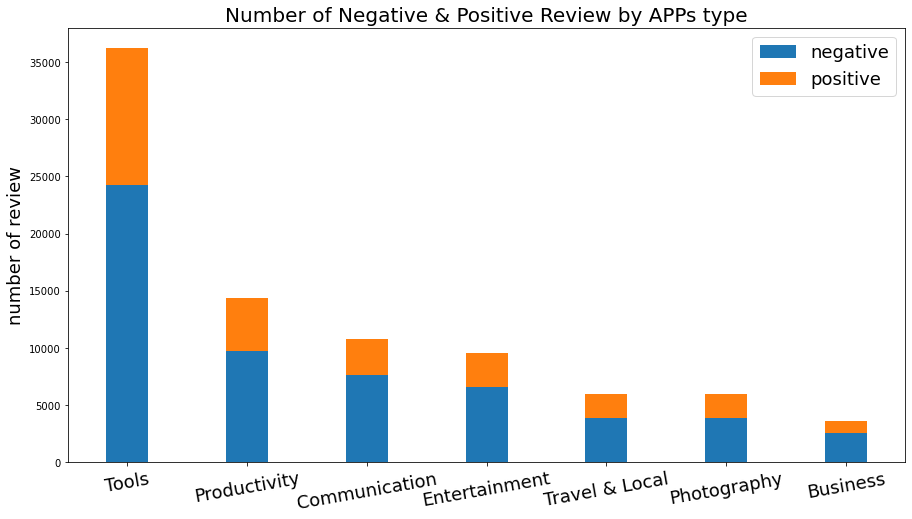

[0.6696497624571871, 0.6745138888888889, 0.7092559992587788, 0.6855208333333334, 0.6411666666666667, 0.6485, 0.7094444444444444]


In [28]:
labels=list(genre7.index)
pos=[]
neg=[]
neg_rate=[]
topic4=[]
topic5=[]
topic6=[]
width = 0.35

for typ in genre7.index:
    typ_genre=new_df["neg_pos"][new_df["genre"]==typ]
    neg_rate.append((sum(typ_genre=='negative'))/(sum(typ_genre=='positive')+sum(typ_genre=='negative')))
    pos.append(sum(typ_genre=='positive'))
    neg.append(sum(typ_genre=='negative'))
    topic4.append(sum(typ_genre=='topic 4'))
    topic5.append(sum(typ_genre=='topic 5'))
    topic6.append(sum(typ_genre=='topic 6'))

plt.rcParams['figure.figsize'] =[15,8]
fig, ax = plt.subplots()

#ax.bar(labels, topic4, width,label='problem/issue')
#ax.bar(labels, topic5, width, bottom=topic4,label='bad experience')
#ax.bar(labels, topic6, width, bottom=topic5,label='do not install')

ax.bar(labels, neg, width, label='negative')
ax.bar(labels, pos, width, bottom=neg, label='positive')
plt.xticks(rotation=10,size=18)

ax.set_ylabel('number of review',size=18)
ax.set_title('Number of Negative & Positive Review by APPs type',size=20)
ax.legend(prop={'size': 18})

plt.show()
print(neg_rate)

# Negtive reviews topic 3/5/6

In [31]:
negative_review =  data_nouns_adj_v[(data_nouns_adj_v['topic']=='topic 6')]#&(data_nouns_adj_v['genre']=='Tools')]
#corpus= data_nouns_adj_v.content[(data_nouns_adj_v['topic']=='topic 6')]
#negative_review
negative_review.shape

(6565, 15)

In [41]:
add_stop_words=['app','use','just','google','like',
                'time','need','make','phone','update','work','works',
                'im','really','option','feature','hey','ok','okay','apps',
                'application','aap','thank','whats','things','wow','sure',
                'love','super','star','good','great','phone','way','word','play','ive','try',
                'samsung galaxy','android','bad','dont']
from sklearn.feature_extraction import text
stop_words1=text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [42]:
cv5 = TfidfVectorizer(stop_words=stop_words1,token_pattern="\\b[a-z][a-z]+\\b",min_df=3,ngram_range=(2,2))
df_cv5 = cv5.fit_transform(negative_review.content)
df_review5=pd.DataFrame(df_cv5.toarray(), index= [negative_review.title], columns=cv5.get_feature_names())
df_review5.columns

Index(['able access', 'able add', 'able ask', 'able change', 'able delete',
       'able download', 'able edit', 'able email', 'able know', 'able login',
       ...
       'youtube watch', 'youtube youtube', 'yr old', 'yt doesnt', 'yt kid',
       'yt music', 'yt search', 'yt studio', 'zero know', 'zoom know'],
      dtype='object', length=3027)

In [43]:
counts = Counter(df_review5.columns)
for col in df_review5.columns:
    counts[col]=sum(df_review5[col]>0)

counts=dict(sorted(counts.items(), key=operator.itemgetter(1,0),reverse=True))

Text(0.5, 1.0, '20 most common words in topic 4 review- Issue/Problem')

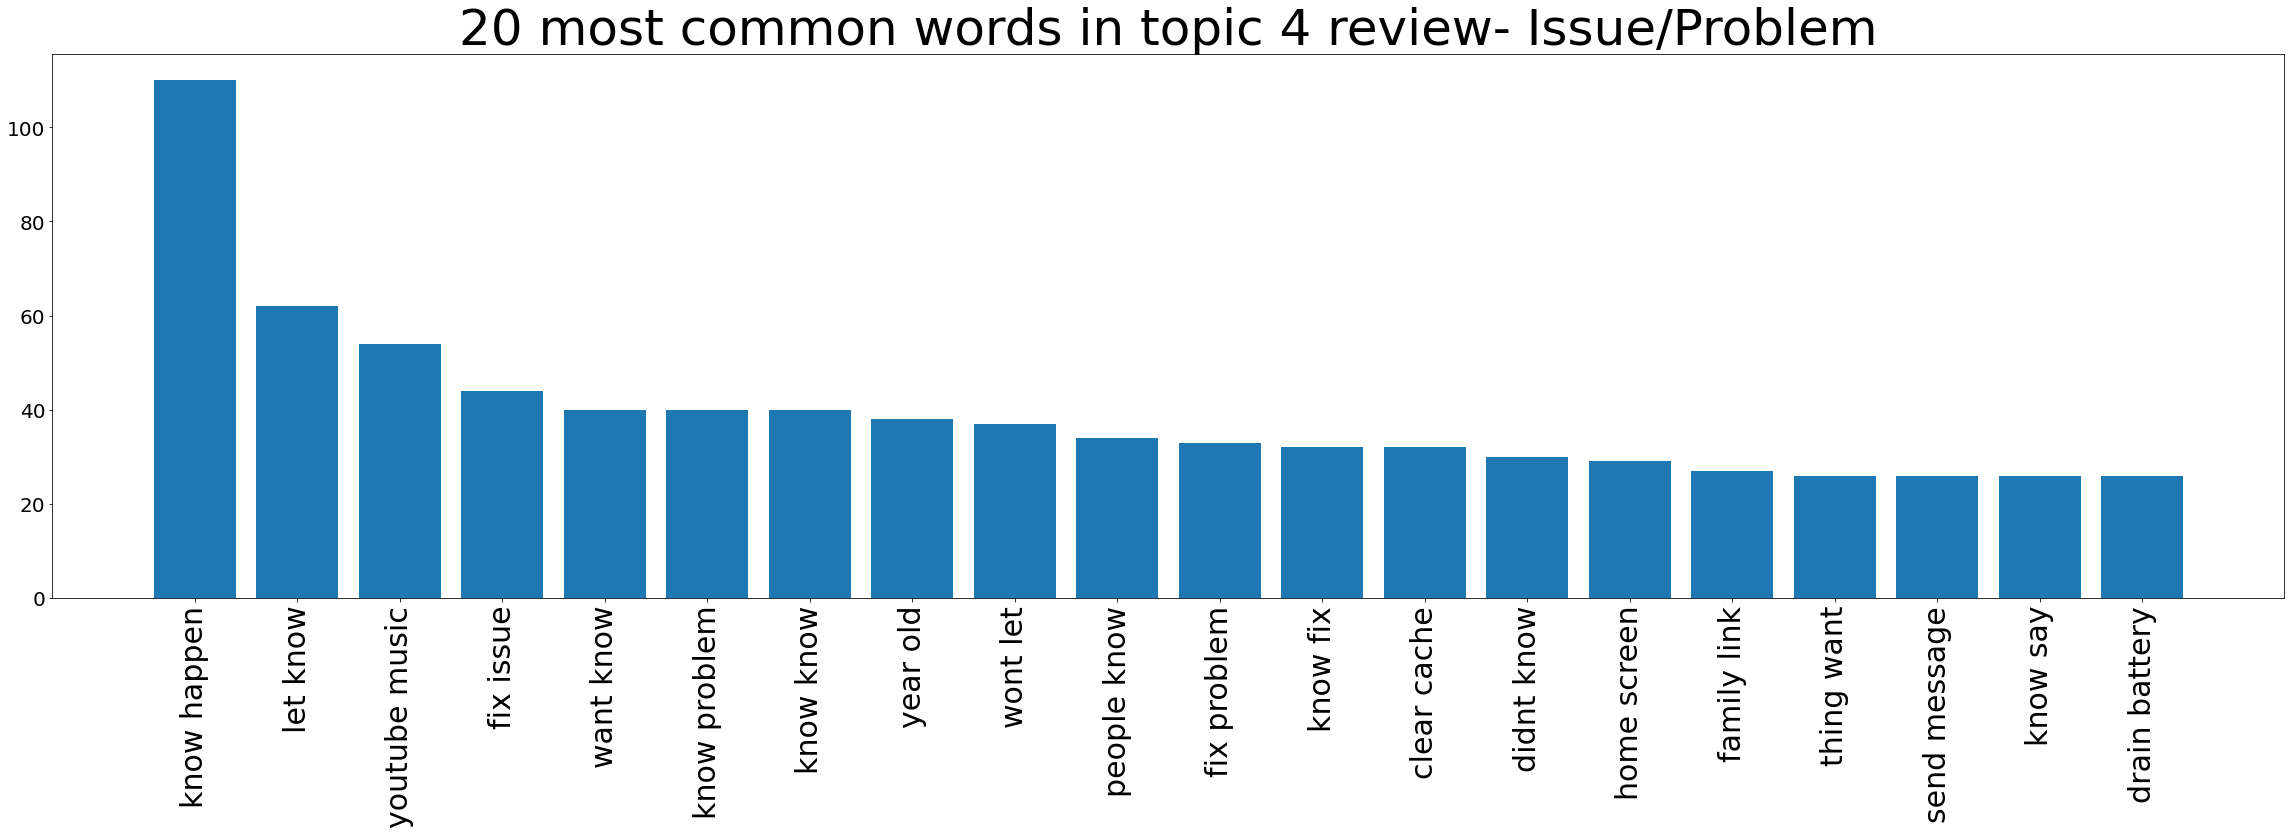

In [44]:
x=[]
y=[]

for key, num in counts.items():
    if key not in stop_words1:
        x.append(key)
        y.append(num)
plt.rcParams['figure.figsize'] =[40,10]
plt.bar(x[0:20],y[0:20])
plt.xticks(rotation=90,size=30)
plt.yticks(size=20)
plt.title('20 most common words in topic 4 review- Issue/Problem',size=50)

In [45]:
negative_review=negative_review.reset_index()
for i in range(len(negative_review)):
    if 'waste storage' in negative_review.content[i]:
               print(negative_review.title[i],negative_review.content[i])

Google Slides i do need app do install use have way get rid google intall anything anybodys phone permission owner phone pay bill dont have enough space phone other apps want be force uninstall make room useless update useless waste storage space
iWnn IME for Nexus be instal device update lollipop have downgrade dont need useless apps waste storage potential harass privacy mess imd
iWnn IME for Nexus be instal device update lollipop have downgrade dont need useless apps waste storage potential harass privacy mess imd
